In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
wine = datasets.load_wine()

In [3]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


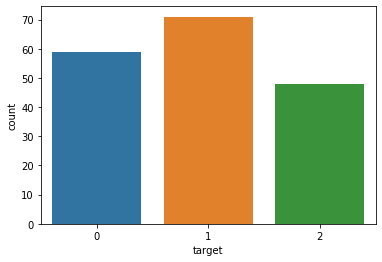

In [6]:
sns.countplot(df_wine.target)
plt.show()

In [7]:
df_wine.isnull().sum().max() # it checks every column 

0

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
X = df_wine.drop('target', axis=1)
y = df_wine.target

In [9]:
knn.fit(X, y)
print(knn.predict(X), knn.predict_proba(X)) # how to launch without output?

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 0
 0 1 1 2 0 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 1 2
 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2] [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.

In [10]:
knn.score(X,y)

0.8707865168539326

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
print(knn1.score(X_train, y_train), knn1.score(X_test, y_test))

knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print(knn1.score(X_train, y_train), accuracy_score(y_pred, y_test)) 

# why knn1.score but accuracy_score without metrics.?
# .neighbours - module, KNeighbours(knn1) - class and score - method (of function?); 
# .metrics - module and accuracy_score - function? 

0.8235294117647058 0.6949152542372882
0.8235294117647058 0.6949152542372882


In [13]:
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train, y_train)
print(knn2.score(X_train, y_train), knn2.score(X_test, y_test))

knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print(knn2.score(X_train, y_train), accuracy_score(y_pred, y_test)) 

0.8235294117647058 0.711864406779661
0.8235294117647058 0.711864406779661


In [14]:
knn2 = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn2, X, y, cv=5, scoring="accuracy"))

[0.62162162 0.72222222 0.66666667 0.65714286 0.85294118]


In [15]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


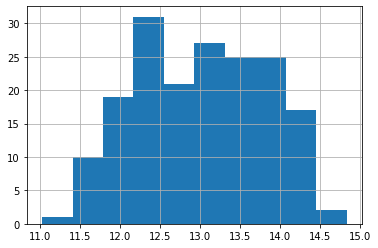

In [16]:
df_wine.alcohol.hist();

In [17]:
df = df_wine.sample(frac=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560.0,2
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.5,0.95,2.26,625.0,1
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.9,1.16,3.14,714.0,1
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.6,1.09,2.78,880.0,0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0,1


In [18]:
#X = df.sample(frac=0.8)
#y = df.drop(X, axis=0) ??
#X.shape, y.shape

In [19]:
knn4 = KNeighborsClassifier(n_neighbors=5)
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42) 

In [20]:
knn4.fit(X_train, y_train)
y_pred = knn4.predict(X_test)
print(knn4.score(X_train, y_train), accuracy_score(y_test, y_pred))

0.8679245283018868 0.632


In [21]:
print(cross_val_score(knn4, X, y, cv=5, scoring="accuracy"))

[0.7027027  0.63888889 0.58333333 0.77142857 0.76470588]


In [22]:
knn5 = KNeighborsClassifier(n_neighbors=3)
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42) 

In [23]:
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X)
print(knn5.score(X, y)) 
print(accuracy_score(y_pred, y))
print(knn5.score(X_test, y_test))

0.7078651685393258
0.7078651685393258
0.616822429906542


#### Chaning a parameter 'algoritm'

In [24]:
knn6 = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42) 

In [25]:
knn6.fit(X_train, y_train)
y_pred = knn6.predict(X_test)
print(knn6.score(X_train, y_train), accuracy_score(y_test, y_pred))

0.8450704225352113 0.616822429906542


Try all - scores does not change

#### Adding a parameter 'weights'

In [26]:
knn7 = KNeighborsClassifier(n_neighbors=11, weights='distance', algorithm='brute')
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) 

In [27]:
knn7.fit(X_train, y_train)
y_pred = knn7.predict(X_test)
print(knn7.score(X_train, y_train), accuracy_score(y_test, y_pred))

1.0 0.7191011235955056


<style>
.text_cell_render {
font-family: Arial, serif;
}
</style>

I don't know why it is 1 score on train

On test k=7/9/11 gives the almost same result and that is better than with k=3/5

In [28]:
# how to change style of font above (in markdown)?

In [29]:
print(cross_val_score(knn7, X, y, cv=5, scoring="accuracy"))

[0.78378378 0.63888889 0.66666667 0.68571429 0.88235294]


#### Changing a paramater 'leaf_sizeint', optional (default = 30)

Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

In [30]:
knn8 = KNeighborsClassifier(n_neighbors=11, algorithm='kd_tree', leaf_size=200)
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42) 

In [31]:
knn8.fit(X_train, y_train)
y_pred = knn8.predict(X_test)
print(knn8.score(X_train, y_train), accuracy_score(y_test, y_pred))

0.7887323943661971 0.6261682242990654


Leaf size didn't change scores

## Tree

In [32]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_prob = tree.predict_proba(X_test)
y_pred_prob

array([[0.90322581, 0.03225806, 0.06451613],
       [0.        , 0.4       , 0.6       ],
       [0.        , 0.4       , 0.6       ],
       [0.        , 0.4       , 0.6       ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 1.        , 0.        ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 0.4       , 0.6       ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 0.4       , 0.6       ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 0.4       , 0.6       ],
       [0.        , 0.4       , 0.6       ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 0.4       , 0.6       ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.        , 1.        , 0.        ],
       [0.90322581, 0.03225806, 0.06451613],
       [0.

In [33]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0


In [34]:
rec = recall_score(y_pred_tree, y_test, average='micro')
rec

0.794392523364486

In [35]:
cross_val_score(tree, X, y, cv=5)

array([0.78378378, 0.88888889, 0.91666667, 0.8       , 0.91176471])

## Tree2

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import load_iris

In [38]:
new_tree = DecisionTreeClassifier()
params = {'max_depth':range(1,20), 'min_samples_split':range(2,11), 'min_samples_leaf':range(1,11)}
search = GridSearchCV(new_tree, params, cv=5)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
best_tree

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_pred_new = best_tree.predict(X)
accuracy_score(y_pred_new, y)

0.9831460674157303

In [40]:
cross_val_score(best_tree, X, y, cv=5)

array([0.91891892, 0.91666667, 0.91666667, 0.94285714, 0.94117647])

## Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_cl = RandomForestClassifier()

In [43]:
params = {'n_estimators' : [5, 10, 15, 20],
          'max_depth' : [5, 10, 15, 20],
          'min_samples_leaf' : [5, 10, 15, 20],
          'min_samples_split' : [5, 10, 15, 20]
         }

In [44]:
search = GridSearchCV(rf_cl, params, cv=5)
search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
best = search.best_estimator_

In [46]:
best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
cross_val_score(best, X, y, cv=5)

array([0.94594595, 1.        , 0.97222222, 0.97142857, 1.        ])

In [48]:
best_whitno_grid = RandomForestClassifier(n_estimators=50, max_depth=5)

In [49]:
best_whitno_grid.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
cross_val_score(best_whitno_grid, X, y, cv=5)

array([0.94594595, 1.        , 1.        , 1.        , 0.97058824])